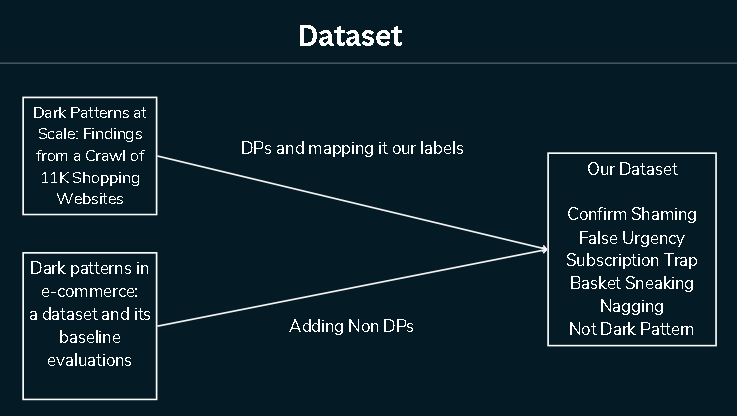

In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=90a7959d848e6000c7c2c86f19c8e0a5ef8d38e764a8111716f9bbd69f9a814c
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk
import time
from nltk.corpus import stopwords
from autocorrect import Speller


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# From Dark patterns in e-commerce:a dataset and its baseline evaluations [paper](https://github.com/yamanalab)

In [ ]:
file_path = '/content/dataset.tsv'

df1 = pd.read_csv(file_path, sep='\t')

In [ ]:
df1.head()

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern


In [ ]:
df1 = df1.loc[df1['Pattern Category'] == 'Not Dark Pattern']

In [ ]:
df1 = df1.drop('page_id', axis=1)
df1 = df1.drop('label', axis=1)
df1.columns = range(len(df1.columns))

#Dark Patterns at Scale: Findings from a Crawl of 11K Shopping Websites [paper](https://arxiv.org/pdf/1907.07032.**pdf**)

In [ ]:
df2=pd.read_csv("/content/org_mathur.csv")

In [ ]:
df2.head()

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/


In [ ]:
df2['Pattern Category'].unique()

array(['Social Proof', 'Misdirection', 'Urgency', 'Forced Action',
       'Obstruction', 'Sneaking', 'Scarcity'], dtype=object)

In [ ]:
df2['Pattern Type'].unique()

array(['Activity Notification', 'Confirmshaming', 'Countdown Timer',
       'Forced Enrollment', 'Hard to Cancel', 'Hidden Costs',
       'Hidden Subscription', 'High-demand Message',
       'Limited-time Message', 'Low-stock Message', 'Pressured Selling',
       'Sneak into Basket', 'Testimonials of Uncertain Origin',
       'Trick Questions', 'Visual Interference'], dtype=object)

In [ ]:
df2 = df2.loc[df2['Pattern Category'] != 'Social Proof']

In [ ]:
df2 = df2.drop('Pattern Category', axis=1)
df2 = df2.drop('Where in website?', axis=1)
df2 = df2.drop('Website Page', axis=1)
df2 = df2.drop('Comment', axis=1)
df2 = df2.drop('Deceptive?', axis=1)

# Mapping

In [ ]:
df2['Pattern Type'] = df2['Pattern Type'].replace('Sneak into Basket', 'Basket Sneaking')
df2['Pattern Type'] = df2['Pattern Type'].replace('Hidden Costs', 'Basket Sneaking')
df2['Pattern Type'] = df2['Pattern Type'].replace('Hard to Cancel', 'Subscription Trap')
df2['Pattern Type'] = df2['Pattern Type'].replace('Hidden Subscription', 'Subscription Trap')
df2['Pattern Type'] = df2['Pattern Type'].replace('Countdown Timer', 'False Urgency')
df2['Pattern Type'] = df2['Pattern Type'].replace('Limited-time Message', 'False Urgency')
df2['Pattern Type'] = df2['Pattern Type'].replace('Low-stock Message', 'False Urgency')
df2['Pattern Type'] = df2['Pattern Type'].replace('High-demand Message', 'False Urgency')
df2['Pattern Type'] = df2['Pattern Type'].replace('Forced Enrollment', 'Nagging')
df2['Pattern Type'] = df2['Pattern Type'].replace('Confirmshaming', 'Shaming')
df2['Pattern Type'] = df2['Pattern Type'].replace('Trick Questions', 'Shaming')
df2['Pattern Type'] = df2['Pattern Type'].replace('Visual Interference', 'Shaming')
df2['Pattern Type'] = df2['Pattern Type'].replace('Pressured Selling', 'Shaming')

In [ ]:
df2.columns = range(len(df2.columns))

In [ ]:
df2.head()

,0,1
313,No thanks! I don't like deals,Shaming
314,"No, I'll rather pay full price.",Shaming
315,I don't like discounts,Shaming
316,"No, thanks. I don't like great deals.",Shaming
317,"No Thanks, I rather pay full price",Shaming


In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df.head()

,0,1
1,Pillowcases & Shams,Not Dark Pattern
2,Write a review,Not Dark Pattern
3,"To start your return, simply click on the foll...",Not Dark Pattern
4,newsletter signup (privacy policy),Not Dark Pattern
6,We cannot guarantee door to door delivery for ...,Not Dark Pattern


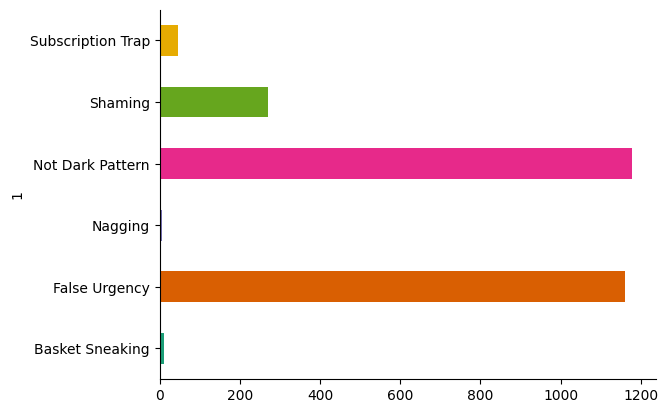

In [ ]:
# @title 1

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby(1).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df[1].unique()

array(['Not Dark Pattern', 'Shaming', 'False Urgency', 'Nagging',
       'Subscription Trap', 'Basket Sneaking'], dtype=object)

In [ ]:
df = df.drop_duplicates()
df.duplicated().any()

False

# Cleaning Text

In [ ]:
# changing to lowercase
df[0] = df[0].str.lower()

# removing urls
df[0] = df[0].str.replace('http\S+|www.\S+', '', case=False)

# removing new lines "\n"
df[0] = df[0].str.replace('\n',' ', regex=True)

# removing all the punctuations
df[0] = df[0].str.replace('[^\w\s]',' ')

# removing integers
df[0] = df[0].str.replace('\d','', regex=True)

# removing emojis
df[0] = df[0].str.replace('[^\w\s#@/:%.,_-]', ' ', flags=re.UNICODE)

# Removing Stopwords

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

df[0] = df[0].apply(lambda text: cleaning_stopwords(text))

df[0].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1                                    pillowcases shams
2                                         write review
3    start return simply click following button add...
4                     newsletter signup privacy policy
6    cannot guarantee door door delivery every cust...
Name: 0, dtype: object

# Correcting Spelling

In [ ]:
spell = Speller(lang='en')

def typo_corrector(text):
    return spell(text)

df[0] = df[0].apply(typo_corrector)

# Applying Lemmatization
played - play

playing - play





In [ ]:
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

df[0] = df[0].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


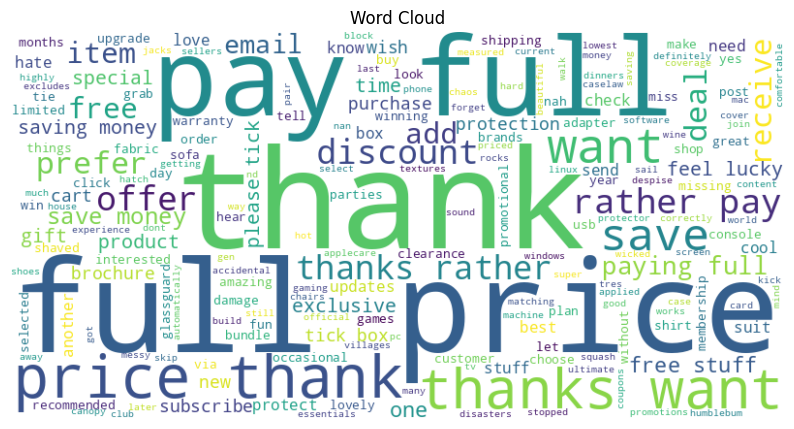

In [ ]:
from wordcloud import WordCloud

# 'Not Dark Pattern', 'Shaming', 'False Urgency', 'Nagging','Subscription Trap', 'Basket Sneaking'
filtered_text = df[df[1] == "Shaming"][0].tolist()

text_combined = ' '.join(filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


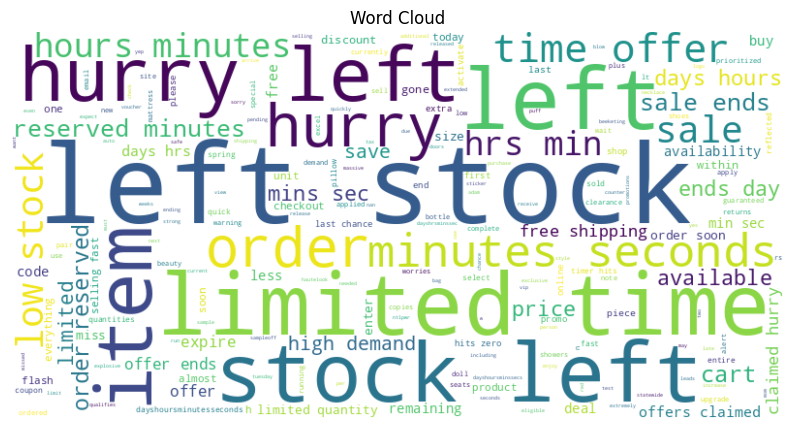

In [ ]:
from wordcloud import WordCloud

# 'Not Dark Pattern', 'Shaming', 'False Urgency', 'Nagging','Subscription Trap', 'Basket Sneaking'
filtered_text = df[df[1] == "False Urgency"][0].tolist()

text_combined = ' '.join(filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


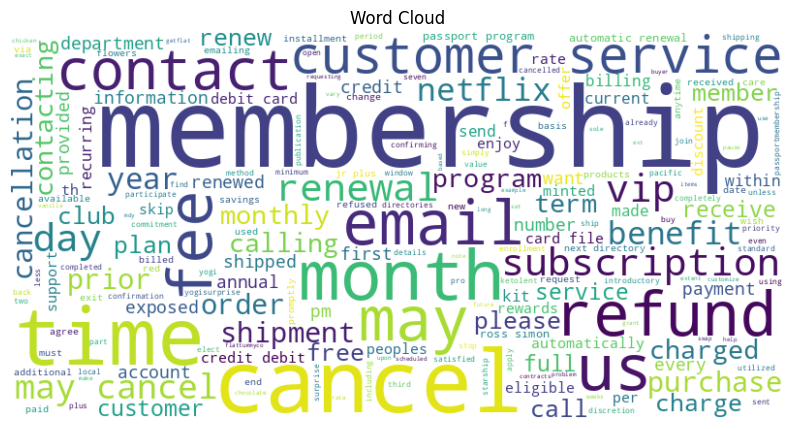

In [ ]:
from wordcloud import WordCloud

# 'Not Dark Pattern', 'Shaming', 'False Urgency', 'Nagging','Subscription Trap', 'Basket Sneaking'
filtered_text = df[df[1] == "Subscription Trap"][0].tolist()

text_combined = ' '.join(filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


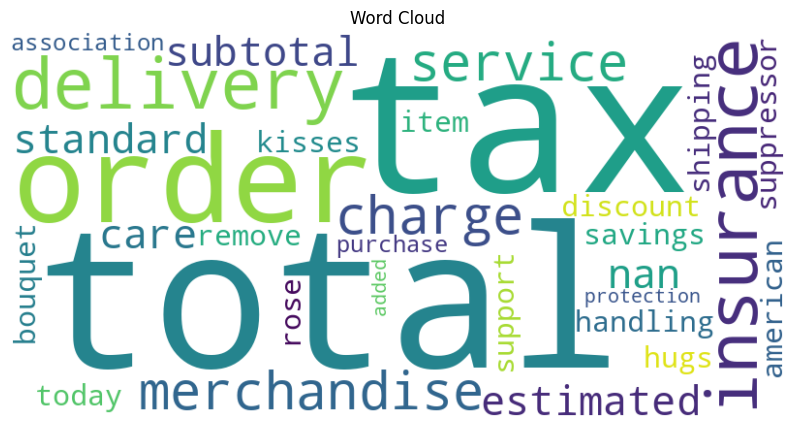

In [ ]:
from wordcloud import WordCloud

# 'Not Dark Pattern', 'Shaming', 'False Urgency', 'Nagging','Subscription Trap', 'Basket Sneaking'
filtered_text = df[df[1] == "Basket Sneaking"][0].tolist()

text_combined = ' '.join(filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


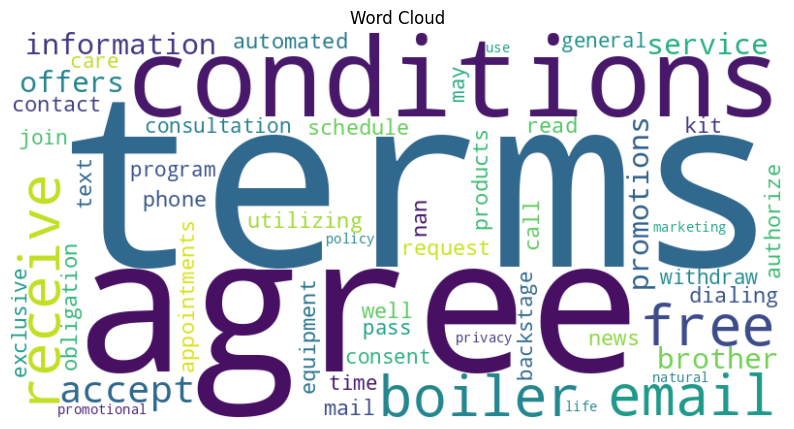

In [ ]:
from wordcloud import WordCloud

# 'Not Dark Pattern', 'Shaming', 'False Urgency', 'Nagging','Subscription Trap', 'Basket Sneaking'
filtered_text = df[df[1] == "Nagging"][0].tolist()

text_combined = ' '.join(filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


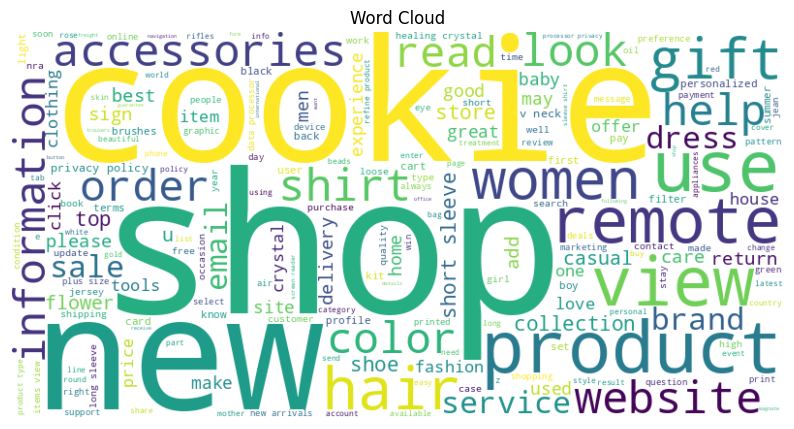

In [ ]:
from wordcloud import WordCloud

# 'Not Dark Pattern', 'Shaming', 'False Urgency', 'Nagging','Subscription Trap', 'Basket Sneaking'
filtered_text = df[df[1] == "Not Dark Pattern"][0].tolist()

text_combined = ' '.join(filtered_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


In [ ]:
df.to_csv("dp_final_data.csv", index=False)
